In [22]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import *

sns.set(style='whitegrid')
np.set_printoptions(suppress=True)

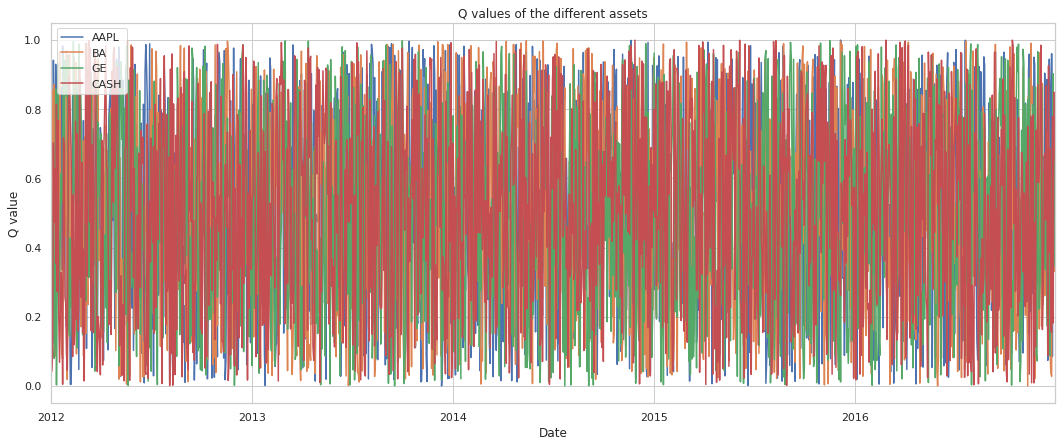

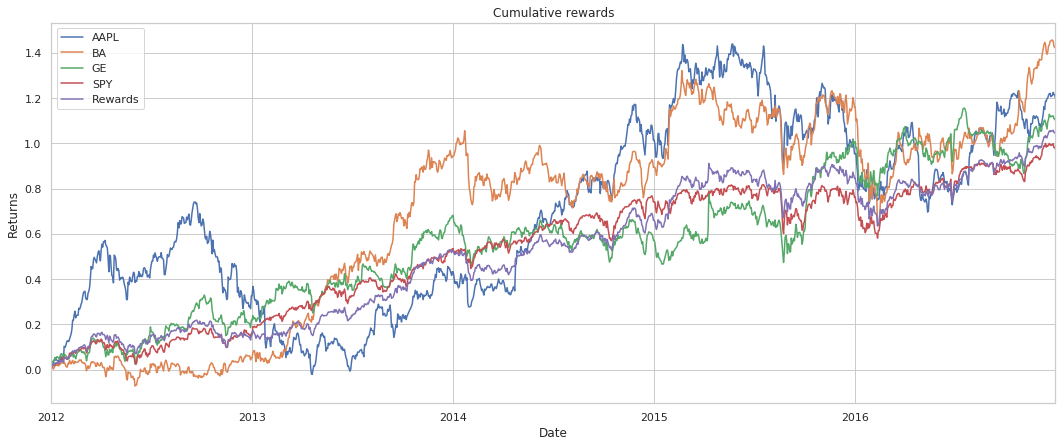

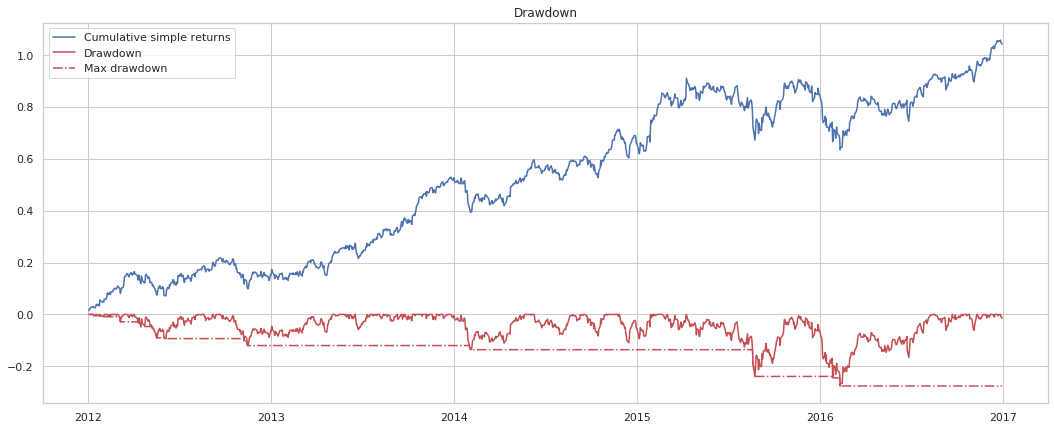

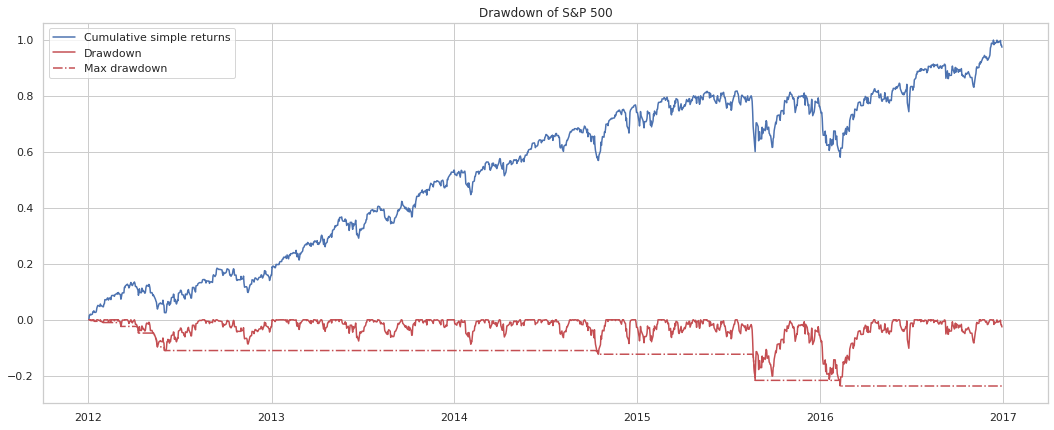

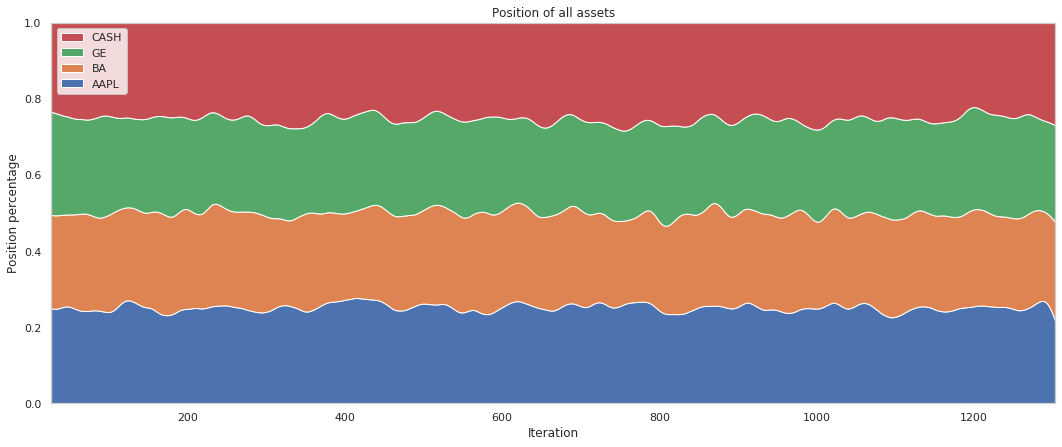

,Sharpe ratio
AAPL,1.64392
BA,2.11701
GE,2.03126
SPY,2.52357
Rewards,2.70849


In [32]:
from stocks import Stocks
from agents.dsrqn import DSRQN
from utils import *
from visualizations import *

agent = DSRQN()

def plot_results(episode):
    # Open the log file
    positions, q_values, rewards = agent.load_logs(episode)
    
    # Plot the q values
    plot(q_values, title='Q values of the different assets', ylabel='Q value')
    
    # Get the baseline stocks
    baseline = Stocks(['AAPL', 'BA', 'GE', 'SPY'], start='2012-1-1', end='2017-1-1')
    
    # Plot cumulative rewards
    plot_cumulative_returns(pd.concat([simple_returns(baseline.prices), rewards], 1))
    
    # Drawdown plot
    plot_drawdown(rewards)
    
    # Drawdown of the S&P index
    plot_drawdown(simple_returns(baseline.prices['SPY']), title='Drawdown of S&P 500')
    
    # Position percentages
    plot_positions(positions)
    
    return show_sharpe_ratio(pd.concat([simple_returns(baseline.prices), rewards], 1))
    
plot_results(0)

In [11]:
import importlib
import stocks
importlib.reload(stocks)
from stocks import Stocks

stocks = Stocks(['AAPL', 'BA', 'GE', 'SPY'], start='2012-1-1', end='2017-1-1')

prices = stocks.prices
sr = simple_returns(prices)
lr = log_returns(prices)
prices.tail()

,AAPL,BA,GE,SPY
date,,,,
2016-12-26,111.04,146.31,28.20,213.24
2016-12-27,111.75,146.01,28.22,213.77
2016-12-28,111.27,144.73,28.05,212.00
2016-12-29,111.24,144.35,28.05,211.96
2016-12-30,110.38,144.34,27.96,211.18


In [12]:
import importlib
import visualizations
importlib.reload(visualizations)
from visualizations import *

show_sharpe_ratio(simple_returns(prices))

,Sharpe ratio
AAPL,1.64392
BA,2.11701
GE,2.03126
SPY,2.52357


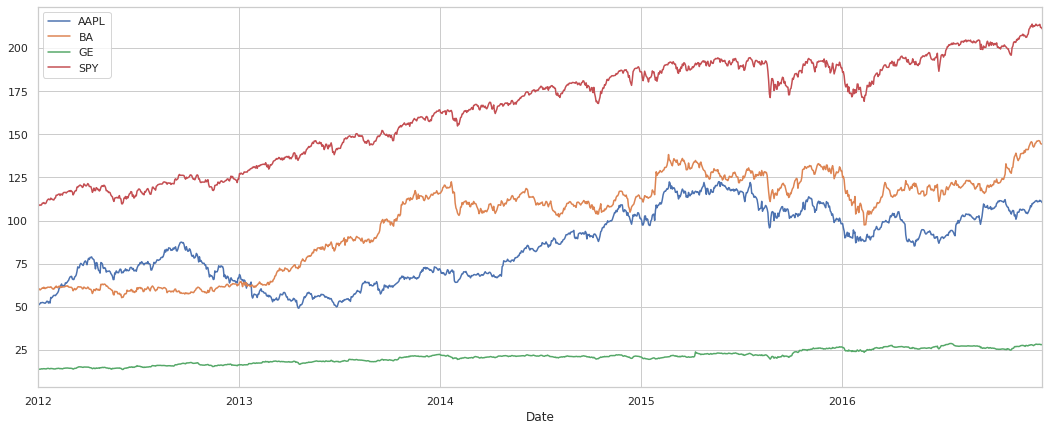

In [13]:
plot(prices)

In [527]:
prices.pct_change().tail()

,AAPL,BA,GE,SPY
date,,,,
2018-03-26,0.047453,0.024819,-0.013866,0.027371
2018-03-27,-0.025658,-0.023837,0.043011,-0.017046
2018-03-28,-0.011059,-0.003447,0.018239,-0.002937
2018-03-29,0.007846,0.024569,-0.014798,0.012776
2018-03-30,0.000000,0.000000,0.000000,0.000000


In [528]:
sr.tail()

,AAPL,BA,GE,SPY
date,,,,
2018-03-26,0.047453,0.024819,-0.013866,0.027371
2018-03-27,-0.025658,-0.023837,0.043011,-0.017046
2018-03-28,-0.011059,-0.003447,0.018239,-0.002937
2018-03-29,0.007846,0.024569,-0.014798,0.012776
2018-03-30,0.000000,0.000000,0.000000,0.000000


In [529]:
lr.tail()

,AAPL,BA,GE,SPY
date,,,,
2018-03-26,0.046361,0.024516,-0.013963,0.027004
2018-03-27,-0.025993,-0.024126,0.042111,-0.017193
2018-03-28,-0.011120,-0.003453,0.018075,-0.002941
2018-03-29,0.007816,0.024272,-0.014908,0.012695
2018-03-30,0.000000,0.000000,0.000000,0.000000


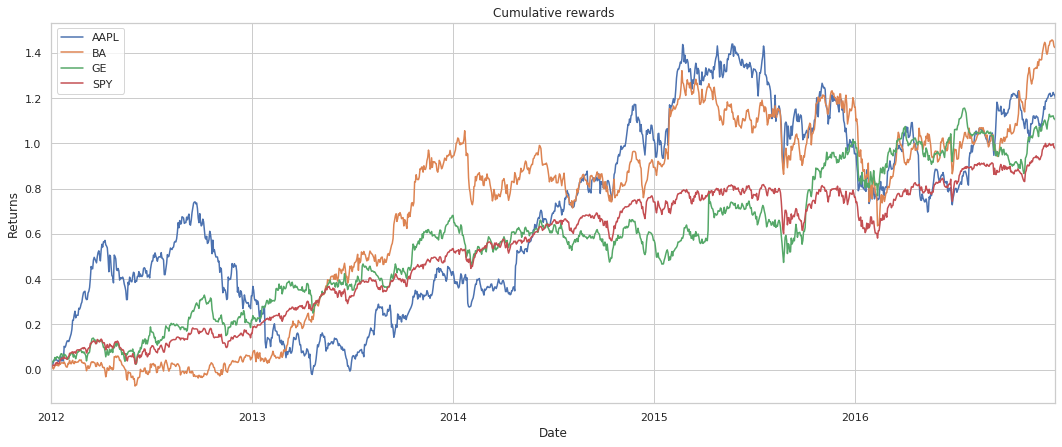

In [14]:
plot_cumulative_returns(sr)

In [532]:
prices

,AAPL,BA,GE,SPY
date,,,,
2012-01-02,50.22,59.56,13.30,106.97
2012-01-03,50.99,60.27,13.64,108.67
2012-01-04,51.27,60.35,13.79,108.84
2012-01-05,51.84,59.71,13.78,109.13
2012-01-06,52.38,60.07,13.85,108.85
2012-01-09,52.30,60.52,14.01,109.12
2012-01-10,52.48,60.90,13.91,110.06
2012-01-11,52.40,60.69,14.03,110.12
2012-01-12,52.25,61.31,14.06,110.39


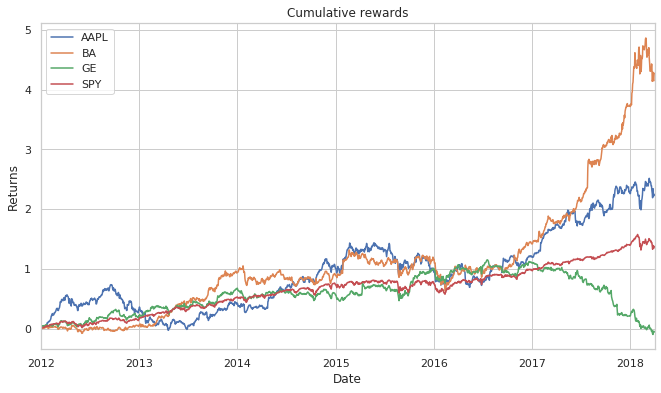

In [533]:
plot_cumulative_returns(simple_returns(prices))

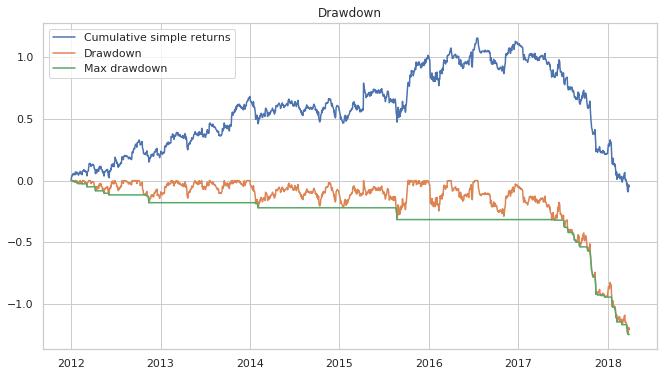

In [534]:
plot_drawdown(simple_returns(prices['GE']))

In [535]:
for ticker in stocks.columns:
    plt.title('Stock price distribution')
    sns.distplot(stocks[ticker])

AttributeError: 'Stocks' object has no attribute 'columns'

In [ ]:
import importlib
import utils
importlib.reload(utils)
from utils import *

cr     = cum_returns(sr)
sharpe = sharpe_ratio(sr)
dd     = drawdown(sr)
mdd    = max_drawdown(sr)

In [ ]:
pd.DataFrame(sharpe, columns=['Sharpe ratio'])

In [ ]:
sr.plot(title='Simple returns');
lr.plot(title='Log returns');

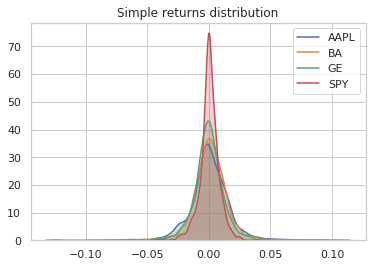

In [480]:
for ticker in sr.columns:
    plt.title('Simple returns distribution')
    sns.kdeplot(sr[ticker], shade=True)

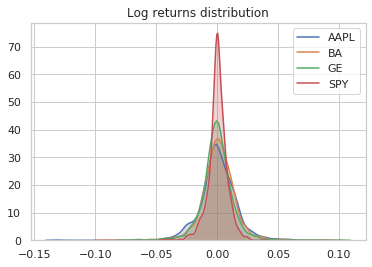

In [481]:
for ticker in sr.columns:
    plt.title('Log returns distribution')
    sns.kdeplot(lr[ticker], shade=True)

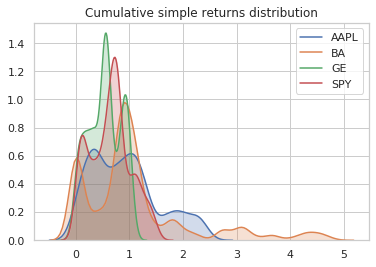

In [482]:
for ticker in cr.columns:
    plt.title('Cumulative simple returns distribution')
    sns.kdeplot(cr[ticker], shade=True)